<a href="https://colab.research.google.com/github/Five-Star-Station/Hansol_QA/blob/main/simso/dacon_hansol_qa_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 이후 런타임 재실행

In [ ]:
!pip install kiwipiepy

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', family='NanumBarunGothic')

plt.style.use("seaborn-talk")
sns.set_palette('gist_earth')

<ipython-input-3-b85df3b34a59>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-talk")


In [4]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data/dacon-hansol-qa/'
train_df = pd.read_csv(base_path + 'train.csv')
test_df = pd.read_csv(base_path + 'test.csv')
submission_df = pd.read_csv(base_path + 'sample_submission.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        644 non-null    object
 1   질문_1      644 non-null    object
 2   질문_2      644 non-null    object
 3   category  644 non-null    object
 4   답변_1      644 non-null    object
 5   답변_2      644 non-null    object
 6   답변_3      644 non-null    object
 7   답변_4      644 non-null    object
 8   답변_5      644 non-null    object
dtypes: object(9)
memory usage: 45.4+ KB


In [6]:
train_df.head()

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
0,TRAIN_000,면진장치가 뭐야?,면진장치에 사용되는 주요 기술은 무엇인가요?,건축구조,면진장치란 지반에서 오는 진동 에너지를 흡수하여 건물에 주는 진동을 줄여주는 진동 ...,"면진장치란 건물의 지반에서 발생하는 진동 에너지를 흡수하여 건물을 보호하고, 진동을...",면진장치란 지반으로부터 발생하는 진동 에너지를 흡수하여 건물에 전달되는 진동을 줄여...,면진장치는 건물의 지반으로부터 오는 진동 에너지를 흡수하여 건물에 전달되는 진동을 ...,면진장치는 건물에 오는 지반 진동의 영향을 최대한으로 흡수하여 건물에 전달되는 진동...
1,TRAIN_001,내진설계의 종류 좀 알려줘,내진설계에는 어떤 종류가 있는지 자세히 알려주실 수 있나요?,건축구조,"내진 설계의 종류로 내진구조, 제진구조, 면진구조가 있습니다.","내진설계에는 내진구조, 제진구조, 면진구조가 있습니다. 내진구조는 건물 구조물이 지...","내진설계에는 주로 내진구조, 제진구조, 면진구조의 세 가지 종류가 있습니다. 이들은...","내진설계에는 주로 내진구조, 제진구조, 면진구조가 사용됩니다. 내진구조는 건물 구조...","내진 설계에는 다양한 종류가 있지만, 대표적으로 내진구조, 제진구조, 면진구조가 있..."
2,TRAIN_002,철골구조의 장점이 뭐야?,철골구조의 장점을 알려줘?,건축구조,철골구조는 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건축이 가...,철골구조의 장점은 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건...,철골구조의 장점은 건물의 외벽에 하중이 적게 걸리기 때문에 고층 건물의 건축이 용이...,"철골구조의 장점은 건물의 외벽이 하중이 걸리지 않아 공간 활용이 용이하고, 고층 건...",철골구조의 장점은 건물의 외벽에 하중이 크게 걸리지 않아 고층 건물을 건축할 수 있...
3,TRAIN_003,철골철근 콘크리트 구조가 뭐야?,철골철근 콘크리트 구조의 장점과 단점에는 무엇이 있을까요?,건축구조,"철근철골콘크리트는 철골과 철근, 그리고 콘크리트를 함께 사용하는 건축 구조입니다. ...","철골철근콘크리트 구조는 건축물을 지탱하는 주요 구조물인 철골과 철근, 그리고 콘크리...",철골철근 콘크리트 구조는 건축물을 지탱하기 위한 구조물에서 일반적으로 사용되는 방식...,"철골철근콘크리트 구조는 철골과 철근, 그리고 콘크리트를 함께 사용하여 만들어지는 건...","철골철근 콘크리트 구조는 강철 골조와 강철 철근, 그리고 콘크리트를 함께 사용하여 ..."
4,TRAIN_004,철골구조는 어떤 방식이 있어?,철골구조의 다양한 방식이 무엇인가요?,건축구조,철골구조는 일반철골구조와 경량철골구조가 있습니다.,철골구조는 일반철골구조와 경량철골구조가 있습니다. 일반철골구조는 주로 대형 건물이나...,철골구조는 주로 일반철골구조와 경량철골구조로 나뉘어집니다. 이들은 건축 시스템에 따...,철골구조는 주로 일반철골구조와 경량철골구조로 구분됩니다. 이외에도 최근에는 고층 건...,철골구조는 일반철골구조와 경량철골구조 두 가지 방식이 주로 사용됩니다. 일반철골구조...


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      130 non-null    object
 1   질문      130 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [8]:
test_df.head()

,id,질문
0,TEST_000,"방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요? 또한, 원목사이딩을 사용..."
1,TEST_001,도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요?
2,TEST_002,"큐블럭의 단점을 알려주세요. 또한, 압출법 단열판을 사용하는 것의 장점은 무엇인가요?"
3,TEST_003,"철골구조를 사용하는 고층 건물에서, 단열 효과를 높이기 위한 시공 방법은 무엇이 있..."
4,TEST_004,도배지의 완전한 건조를 위해 몇 주 동안 기다려야 하나요?


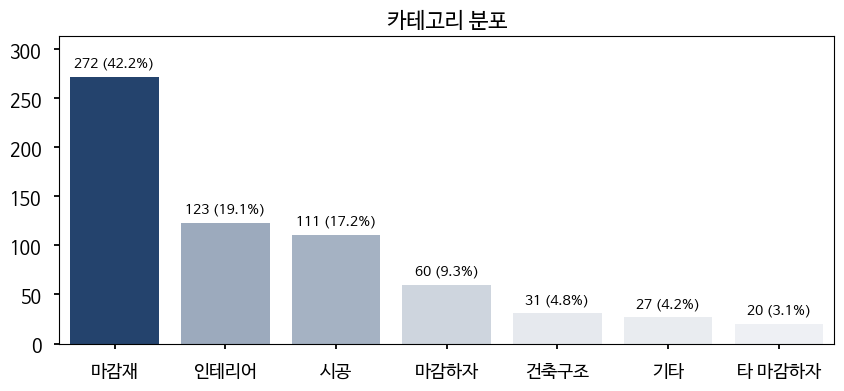

In [45]:
plt.figure(figsize=(10, 4))
tmp = train_df.category.value_counts()
ax = sns.barplot(tmp)

for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s = f"{round(y)} ({y/train_df.shape[0]*100:.1f}%)"
    p.set_fc((*p.get_fc()[:-1], y/max(tmp)))
    ax.text(x, y+10, s, ha='center')
ax.set_ylim(top=ax.get_ylim()[1]*1.1)
ax.set_ylabel('')
plt.title("카테고리 분포")
plt.show()

In [14]:
train_label = train_df[['id']].copy()
cols = ['질문_1', '질문_2']
for i, col in enumerate(cols, 1):
    train_label[f'q{i}_qmark'] = train_df[col].str.contains('\?')

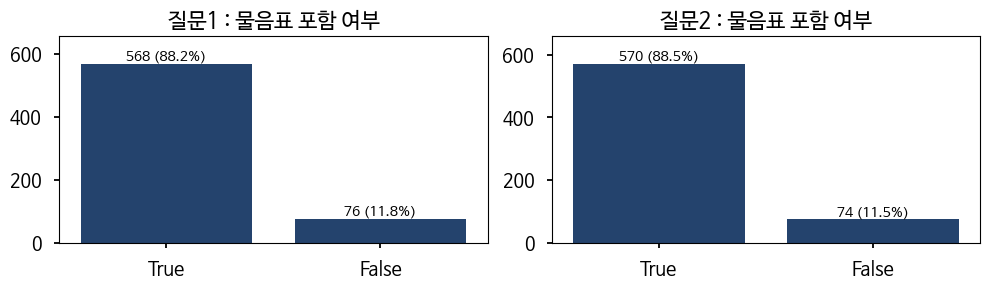

In [46]:
fig = plt.figure(figsize=(10, 3))

fig.add_subplot(1, 2, 1)
tmp = train_label['q1_qmark'].value_counts()
ax1 = sns.barplot(tmp, order=[True, False])

for p in ax1.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s = f"{round(y)} ({y/train_df.shape[0]*100:.1f}%)"
    # p.set_fc((*p.get_fc()[:-1], y/max(tmp)))
    ax1.text(x, y+10, s, ha='center')
ax1.set_ylim(top=ax1.get_ylim()[1]*1.1)
ax1.set_title('질문1 : 물음표 포함 여부')
ax1.set_ylabel('')

fig.add_subplot(1, 2, 2)
tmp = train_label['q2_qmark'].value_counts()
ax2 = sns.barplot(tmp, order=[True, False])

for p in ax2.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s = f"{round(y)} ({y/train_df.shape[0]*100:.1f}%)"
    # p.set_fc((*p.get_fc()[:-1], y/max(tmp)))
    ax2.text(x, y+10, s, ha='center')
ax2.set_ylim(top=ax2.get_ylim()[1]*1.1)
ax2.set_title('질문2 : 물음표 포함 여부')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [16]:
pd.crosstab(train_label['q1_qmark'], train_df['category'])

category,건축구조,기타,마감재,마감하자,시공,인테리어,타 마감하자
q1_qmark,,,,,,,
False,3,1,35,12,11,14,0
True,28,26,237,48,100,109,20


In [17]:
pd.crosstab(train_label['q2_qmark'], train_df['category'])

category,건축구조,기타,마감재,마감하자,시공,인테리어,타 마감하자
q2_qmark,,,,,,,
False,5,4,47,2,11,5,0
True,26,23,225,58,100,118,20


In [18]:
keywords = {'how': ['어떻게', '방법', '팁', '요령', '아이디어', '대책'],
            'who': ['누구', '누가'],
            'why': ['왜', '이유', '원인'],
            'when': ['언제'],
            'where': ['어디'],
            'what': ['장점', '단점', '뭐', '종류', '어떤', '무엇', '얼마', '특징', '차이', '설명', '대해', '추천', '어느', '몇', '뭔', '주의']}
cols = ['질문_1', '질문_2']
for i, col in enumerate(cols, 1):
    train_label[f'q{i}_kw'] = [list() for _ in range(train_df.shape[0])]
    train_label[f'q{i}_category'] = None
    for q_category, kws in keywords.items():
        for kw in kws:
            train_label.loc[train_df[col].str.contains(kw), f'q{i}_kw'] = train_label.loc[train_df[col].str.contains(kw), f'q{i}_kw'].map(lambda x: x +[kw])
            train_label.loc[(train_df[col].str.contains(kw)) & (train_label[f'q{i}_category'].isna()), f'q{i}_category'] = q_category

In [19]:
tmp_df = train_df[(train_label['q1_kw'].map(lambda x: len(x)) == 0) & (train_label['q2_kw'].map(lambda x: len(x)) == 0)]
print("키워드 미포함 질문 수: ", tmp_df.shape[0])
tmp_df

키워드 미포함 질문 수:  18


,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
175,TRAIN_175,남은 도배풀을 변기에 버려도 돼?,도배풀을 변기에 버리는 것이 안전한지 확인해야 할까요?,마감재,도배풀에 본드가 섞여있으면 배관을 막을 수도 있으니 일반 종량제 봉투에 버리는 것을...,도배풀은 변기에 버리지 않도록 해야 합니다. 만약 도배풀에 본드가 섞여 있으면 변기...,도배풀은 변기에 버리지 않는 것이 좋습니다. 변기에 버리게 되면 배관을 막을 수 있...,도배풀은 변기에 버리기에 적합하지 않습니다. 변기에 버리면 배관을 막을 수 있으며 ...,본드가 섞여있는 도배풀은 변기에 물리지 않는 것이 좋습니다. 변기로 버리게 되면 배...
331,TRAIN_331,절단 부위가 과소하면 도배지가 찢어질 수 있어?,절단 부위가 과소하면 도배지가 찢어질 가능성이 있나요?,마감하자,도배지 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 수...,도배지의 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 ...,도배지 절단 부위가 구조물에 비해 과소하게 절단되면 도배지의 강도가 부족해져서 장력...,도배지의 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 ...,"도배지의 절단 부위가 구조물에 비해 과소하게 절단되면, 도배지가 구조물의 변형에 따..."
332,TRAIN_332,기존 실크 벽지를 불완전 제거할 경우 도배지가 찢어질 수 있어?,도배지를 완전히 제거하지 않고 벽지를 교체하면 도배지가 찢어질 가능성이 있을까요?,마감하자,기존 실크 벽지를 제대로 제거하지 않은 경우 터짐 하자가 발생할 수 있습니다.,"기존의 실크 벽지를 완전히 제거하지 않고 새로운 도배를 하게 되면, 도배지가 찢어질...",기존 실크 벽지를 완전히 제거하지 않으면 도배지가 찢어질 수 있는 터짐 하자가 발생...,기존 실크 벽지를 완전하게 제거하지 않을 경우 도배지가 찢어질 수 있는 터짐 하자가...,기존 실크 벽지를 완전하게 제거하지 않은 경우 도배지가 찢어질 수 있는 터짐 하자가...
349,TRAIN_349,벽면의 손상이 발생했을 때 도배지 끝부분이 들뜰 수 있어?,벽면 손상이 발생한 경우 도배지 끝부분이 들떨 수 있을까요?,마감하자,벽면에 손상이 있을 경우 손상된 벽을 통해 습기가 유입하는 등의 원인으로 인해 들뜸...,도배지 끝 부분이 들뜨는 현상은 일반적으로 벽면의 손상으로 인해 발생할 수 있습니다...,"들뜸 현상은 벽면에 손상이 있을 경우, 손상된 벽을 통해 습기가 유입하는 등의 원인...",들뜸 현상은 벽면에 손상이 있을 경우 발생할 수 있는 문제 중 하나입니다. 벽면의 ...,"들뜸현상이 발생하는 경우, 손상된 벽을 통해 습기가 유입하여 도배지의 끝 부분이 벽..."
350,TRAIN_350,불안정한 온도로 인해 도배지 꼬임이 발생할 수 있어?,도배시 불안정한 온도로 인해 꼬임이 발생할 수 있나요?,마감하자,온도의 큰 변화는 도배지의 팽창과 수축을 유발하고 접착제의 안정성에도 영향을 미쳐 ...,온도의 큰 변화는 도배지의 팽창과 수축을 유발하고 접착제의 안정성에도 영향을 미칩니...,"온도의 급격한 변화는 도배지의 팽창과 수축을 유발할 수 있으며, 이는 접착제의 안정...",온도의 큰 변화는 도배지의 팽창과 수축을 유발하여 접착재의 안정성에 영향을 미쳐 도...,온도의 큰 변화는 도배지의 팽창과 수축을 유발하여 꼬임이 발생할 수 있습니다. 따라...
355,TRAIN_355,부실 시공으로 인해 타공하자가 발생할 수 있어?,부실 시공으로 인해 타공하자가 발생하는 경우가 있나요?,마감하자,적절하지 않은 도구로 작업하거나 타공부위의 크기를 정확히 측정하지 않고 작업하면 타...,적절하지 않은 도구로 작업하거나 타공부위의 크기를 정확히 측정하지 않고 작업하는 경...,부실 시공으로 인해 타공불량이 발생할 수 있습니다. 타공을 할 때 적절하지 않은 도...,"타공불량은 부실한 시공으로 인해 발생할 수 있습니다. 예를 들어, 적절하지 않은 도...",적절하지 않은 도구로 작업하거나 타공 부위의 크기를 정확히 측정하지 않고 작업하면 ...
365,TRAIN_365,석고보드의 이동으로 인해 도배지 꼬임이 발생할 수 있어?,석고보드의 이동으로 인해 도배지 꼬임이 발생하는 경우가 있는가요?,마감하자,도배지를 붙인 석고보드가 이동하면서 꼬임이 발생할 수 있습니다.,도배지 꼬임의 일반적인 원인 중 하나로 석고보드가 이동하는 경우가 있습니다. 석고보...,도배지 꼬임의 하나의 가능한 원인으로 석고보드가 이동하는 상황이 있을 수 있습니다....,도배지를 붙인 석고보드가 이동하면서 꼬임이 발생할 수 있습니다. 도배지 꼬임은 석고...,도배지 꼬임 하자란 도배지에 꽈배기 형태의 주름이 생기는 것을 의미합니다. 석고보드...
366,TRAIN_366,물리적 변화에 의해 석고수정이 발생할 수 있어?,물리적 변화로 석고수정이 생길 수 있는 경우가 있나요?,마감하자,건물이 오래되거나 지진 등의 물리적인 변화가 발생하면 벽을 이루고 있는 석고의 수정...,물리적 변화에 의해 석고수정은 발생할 수 있습니다. 건물이 오래되거나 지진 등의 물...,물리적 변화에 의해 석고 수정이 발생하는 것은 가능합니다. 건물이 오래되거나 지진과...,물리적인 변화에 의해 건물이 오래되거나 지진 등의 영향을 받으면 벽을 이루고 있는 ...,물리적인 변화로 인해 건물이 오랜 시간 동안 노출되거나 지진과 같은 외부 요인에 의...
369,TRAIN_369,높은 습도로 인해 도배지에 녹이 묻어나올 수 있어?,높은 습도로 인해 도배지에 녹이 묻어나오는 경우가 있는가요?,마감하자,높은 습도로 인해 도배지 안쪽의 금속이 녹이 슬어 도배지에 베어나올 수 있습니다.,높은 습도로 인해 도배지 안쪽의 금속이 녹이 슬어 도배지에 베어나오는 경우가 있을 ...,높은 습도로 인해 도배지 안쪽에 사용된 금속 소재가 녹을 수 있습니다. 이로 인해 ...,높은 습도로 인해 도배지 안쪽의 금속이 녹아 도배지에 베어나올 수 있습니다. 습도가...,높은 습도로 인해 도배지 안쪽의 금속이 녹아서 도배지에 베어나올 수 있습니다. 습기...
370,TRAIN_370,화학 물질에 의해 도배지에 오염이 발생할 수 있어?,화학 물질로 인해 도배지가 오염될 수 있는 위험이 있나요?,마감하자,도배지가 화학물질에 노출되면 오염이 발생할 수 있습니다.,도배지가 화학물질에 노출되면 오염이 발생할 수 있습니다. 화학물질은 도배지의 표면을...,도배지가 화학물질에 노출되면 그것이 실제로 오염을 일으킬 수 있습니다. 특히 화학물...,화학 물질에 노출되면 도배지가 오염되는 경우가 있습니다. 이러한 경우에는 도배지의 ...,화학 물질은 도배지에 오염을 일으킬 수 있는 잠재적인 위험이 있습니다. 도배지가 화...


In [20]:
train_label['q1_category'].value_counts(dropna=False)

what     440
how      114
None      56
why       21
where     10
when       3
Name: q1_category, dtype: int64

In [21]:
train_label['q2_category'].value_counts(dropna=False)

what     469
how      109
why       34
None      24
where      7
when       1
Name: q2_category, dtype: int64

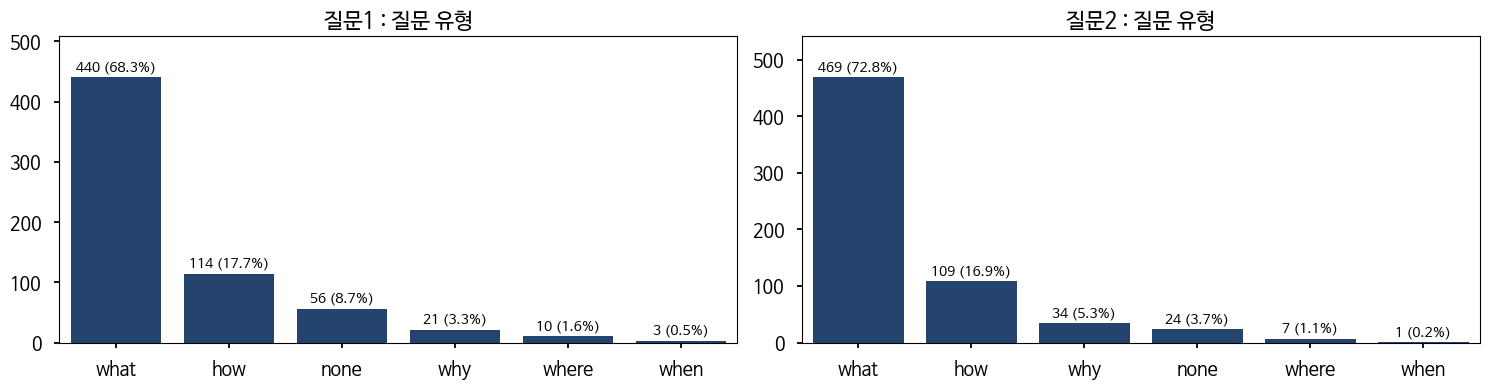

In [47]:
fig = plt.figure(figsize=(15, 4))

fig.add_subplot(1, 2, 1)
tmp = train_label['q1_category'].fillna('none').value_counts()
ax1 = sns.barplot(tmp)

for p in ax1.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s = f"{round(y)} ({y/train_df.shape[0]*100:.1f}%)"
    # p.set_fc((*p.get_fc()[:-1], y/max(tmp)))
    ax1.text(x, y+10, s, ha='center')
ax1.set_ylim(top=ax1.get_ylim()[1]*1.1)
ax1.set_title('질문1 : 질문 유형')
ax1.set_ylabel('')

fig.add_subplot(1, 2, 2)
tmp = train_label['q2_category'].fillna('none').value_counts()
ax2 = sns.barplot(tmp)

for p in ax2.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s = f"{round(y)} ({y/train_df.shape[0]*100:.1f}%)"
    # p.set_fc((*p.get_fc()[:-1], y/max(tmp)))
    ax2.text(x, y+10, s, ha='center')
ax2.set_ylim(top=ax2.get_ylim()[1]*1.1)
ax2.set_title('질문2 : 질문 유형')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [25]:
pd.crosstab(train_label['q1_category'], train_label['q2_category'])

q2_category,how,what,when,where,why
q1_category,,,,,
how,74,37,0,1,0
what,13,410,0,2,11
when,0,2,1,0,0
where,1,5,0,4,0
why,1,3,0,0,17


In [26]:
# yes/no 유형의 답변, 혹은 설명을 요구하는 경우
train_df[train_label['q1_category'].isna()]

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
27,TRAIN_027,내진설계에서 안정성이 높은 순서대로 말해줘,내진설계에서 안전성을 높이기 위한 순서는 무엇인가요?,건축구조,"내진설계는 면진구조, 제진구조, 내진구조 순으로 안정성이 높습니다.","내진설계에서 안정성이 높은 순서로는 먼저 면진구조, 다음으로 제진구조, 마지막으로 ...",내진설계에서 안정성이 높은 순서대로 설명해 드리겠습니다. 먼저 제진구조가 가장 안정...,내진설계에서 안정성이 높은 순서대로 설명드리겠습니다. 일반적으로 내진설계에서는 내진...,내진설계에서 안정성이 높은 순서대로 설명드리겠습니다. 먼저 내진설계에서 안정성이 높...
175,TRAIN_175,남은 도배풀을 변기에 버려도 돼?,도배풀을 변기에 버리는 것이 안전한지 확인해야 할까요?,마감재,도배풀에 본드가 섞여있으면 배관을 막을 수도 있으니 일반 종량제 봉투에 버리는 것을...,도배풀은 변기에 버리지 않도록 해야 합니다. 만약 도배풀에 본드가 섞여 있으면 변기...,도배풀은 변기에 버리지 않는 것이 좋습니다. 변기에 버리게 되면 배관을 막을 수 있...,도배풀은 변기에 버리기에 적합하지 않습니다. 변기에 버리면 배관을 막을 수 있으며 ...,본드가 섞여있는 도배풀은 변기에 물리지 않는 것이 좋습니다. 변기로 버리게 되면 배...
188,TRAIN_188,실내 흡연을 하면 벽지가 변색될 수 있어?,흡연으로 인해 벽지가 변색되는 것을 방지하려면 어떤 조치를 취해야 할까요?,마감재,실내흡연을 하면 벽지가 누렇게 변색될 수 있습니다.,실내 흡연으로 인해 벽지가 누렇게 변색될 수 있습니다. 담배 연기에 함유된 니코틴과...,실내흡연을 하면 벽지가 누렇게 변색될 수 있습니다. 담배 연기에 함유된 니코틴과 다...,"실내흡연을 하면 벽지가 노랗게 변색될 수 있습니다. 특히, 담배 연기에 함유된 니코...","실내흡연을 하게 되면 담배 연기에 함유된 니코틴, 수은 및 기타 화학물질이 벽지에 ..."
330,TRAIN_330,건조시간 부족으로 인해 도배지 울음이 발생할 수 있어?,"건조시간이 부족하면 도배지에 울음이 발생할 수 있다는데, 왜 건조시간이 부족하면 울...",마감하자,도배 후 완전 건조되기 전까지 울음이 발생할 수 있습니다. 제조사 권장 건조시간(일...,도배 후 완전 건조되기 전까지 울음이 발생할 수 있습니다. 제조사 권장 건조시간(보...,건조시간 부족으로 인해 도배지 울음이 발생할 수 있습니다. 도배 후 완전 건조되기 ...,건조시간 부족으로 인해 도배지 울음이 발생할 수 있습니다. 도배 후 완전 건조되기 ...,"건조시간이 충분하지 않을 경우, 도배지 울음이 발생할 수 있습니다. 일반적으로 제조..."
331,TRAIN_331,절단 부위가 과소하면 도배지가 찢어질 수 있어?,절단 부위가 과소하면 도배지가 찢어질 가능성이 있나요?,마감하자,도배지 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 수...,도배지의 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 ...,도배지 절단 부위가 구조물에 비해 과소하게 절단되면 도배지의 강도가 부족해져서 장력...,도배지의 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 ...,"도배지의 절단 부위가 구조물에 비해 과소하게 절단되면, 도배지가 구조물의 변형에 따..."
332,TRAIN_332,기존 실크 벽지를 불완전 제거할 경우 도배지가 찢어질 수 있어?,도배지를 완전히 제거하지 않고 벽지를 교체하면 도배지가 찢어질 가능성이 있을까요?,마감하자,기존 실크 벽지를 제대로 제거하지 않은 경우 터짐 하자가 발생할 수 있습니다.,"기존의 실크 벽지를 완전히 제거하지 않고 새로운 도배를 하게 되면, 도배지가 찢어질...",기존 실크 벽지를 완전히 제거하지 않으면 도배지가 찢어질 수 있는 터짐 하자가 발생...,기존 실크 벽지를 완전하게 제거하지 않을 경우 도배지가 찢어질 수 있는 터짐 하자가...,기존 실크 벽지를 완전하게 제거하지 않은 경우 도배지가 찢어질 수 있는 터짐 하자가...
333,TRAIN_333,누수에 의해 도배지에 녹이 묻어나올 수 있어?,도배지에 녹이 묻어나올 수 있는 누수의 경우 어떻게 예방할 수 있을까요?,마감하자,누수에 의해 도배지가 젖어 있는 상태가 지속되면 곰팡이가 발생할 수 있습니다.,"누수로 인해 도배지가 젖은 상태가 오래 지속되면, 녹이 묻어나올 수 있습니다. 이러...","누수로 인해 도배지가 젖어 있으면, 곰팡이가 발생할 수 있습니다. 이를 방지하기 위...",물이 도배지에 스며들면 곰팡이가 생길 가능성이 있습니다. 이런 경우에는 물을 천으로...,"누수로 도배지가 젖은 상태가 오래 지속될 경우, 녹이 묻어나올 수 있습니다. 녹이 ..."
334,TRAIN_334,도배지에 울음이 생겼어,도배지에 울음이 생기는 이유가 뭔가요?,마감하자,도배지 울음이란 도배지가 평평하지 않고 국소적으로 볼록하게 튀어나오는 현상을 의미합...,도배지 울음은 도배지가 평평하지 않고 국소적으로 볼록하게 튀어나오는 현상을 의미합니...,도배지 울음이란 도배지가 평평하지 않고 국소적으로 볼록하게 튀어나오는 현상을 의미합...,도배지 울음은 도배가 터져 나오거나 볼록해 보이는 현상을 의미합니다. 일반적으로 이...,도배지 울음이란 도배지가 평평하지 않고 국소적으로 볼록하게 튀어나오는 현상을 말합니...
335,TRAIN_335,벽면에 손상이 있을 경우 도배지 꼬임이 발생할 수 있어?,도배지 꼬임이 발생하는 것을 방지하기 위해서는 벽면 손상을 어떻게 처리해야 하나요?,마감하자,벽면에 손상이 있을 경우 손상된 벽을 통해 습기가 유입하는 등의 원인으로 인해 꼬임...,"네, 벽면에 손상이 있을 경우 손상된 벽을 통해 습기가 유입하여 도배지 꼬임이 발생...","벽면에 손상이 있을 경우, 해당 부분을 통해 습기가 유입되어 도배지 꼬임이 발생할 ...",벽면에 손상이 있을 경우 손상된 벽을 통해 습기가 유입되어 도배지 꼬임이 발생할 가...,"벽면에 손상이 있을 경우, 습기가 도배지에 스며들거나 도배지가 팽창하여 꼬임이 발생..."
339,TRAIN_339,높은 습도로 인해 도배지와 몰딩면에 틈새가 생길 수 있어?,고습으로 인해 도배지와 몰딩면에 생길 수 있는 틈새를 막는 방법이 있을까요?,마감하자,높은 습도로 인해 도배풀의 접착력이 떨어지면 이음부 불량이 발생할 수 있습니다.,높은 습도로 인해 도배풀의 접착력이 떨어지면 몰딩면과 도배지 사이에 틈새가 생길 수...,높은 습도로 인해 도배풀의 접착력이 떨어지면 도배지와 몰딩면에 틈새가 생길 수 있습...,높은 습도로 인해 도배지와 몰딩면의 틈새가 생길 수 있습니다. 습기는 도배지의 접착...,높은 습도로 인해 도배풀의 접착력이 떨어지면 도배지와 몰딩면 사이에 틈새가 생길 수...


In [27]:
# 문장만 다른 경우도 있지만, 질문 내용이 전혀 다른 경우도 있음 (42)
train_df[train_label['q1_category'] != train_label['q2_category']]

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
17,TRAIN_017,건축물의 구조는 어떻게 구분해?,건축물의 구조를 구분하는 데 어떤 기준을 활용해야 하나요?,건축구조,"건축물의 구조는 목구조, 조적조, 철골구조, 콘크리트구조로 구별할 수 있습니다.",건축물의 구조는 건물을 지탱하고 지지하는 데 사용되는 재료 및 방식에 따라 구분됩니...,"건축물의 구조는 주로 목구조, 조적조, 철골구조, 콘크리트구조로 구분됩니다. 목구조...",건축물의 구조는 다양한 유형으로 분류할 수 있습니다. 주로 사용되는 구조 유형에는 ...,"건축물의 구조는 주로 목구조, 조적구조, 철골구조, 콘크리트구조로 구분합니다. 목구..."
27,TRAIN_027,내진설계에서 안정성이 높은 순서대로 말해줘,내진설계에서 안전성을 높이기 위한 순서는 무엇인가요?,건축구조,"내진설계는 면진구조, 제진구조, 내진구조 순으로 안정성이 높습니다.","내진설계에서 안정성이 높은 순서로는 먼저 면진구조, 다음으로 제진구조, 마지막으로 ...",내진설계에서 안정성이 높은 순서대로 설명해 드리겠습니다. 먼저 제진구조가 가장 안정...,내진설계에서 안정성이 높은 순서대로 설명드리겠습니다. 일반적으로 내진설계에서는 내진...,내진설계에서 안정성이 높은 순서대로 설명드리겠습니다. 먼저 내진설계에서 안정성이 높...
31,TRAIN_031,아세톤에 노출되면 어디가 안좋아?,아세톤에 노출되면 발생할 수 있는 문제가 뭐야?,기타,"아세톤은 페인트와 같은 물질에 있는 독성물질로, 이에 노출되면 언어장애, 두통, 협...","아세톤은 페인트와 같은 물질에 있는 독성물질로, 노출되면 심각한 건강 문제를 유발할...",아세톤에 노출되면 그것은 매우 위험할 수 있습니다. 아세톤은 페인트 등의 물질에 함...,"아세톤에 노출되면 두통, 협응력 부족, 무기력, 저혈압과 같은 증상이 발생할 수 있...","아세톤에 노출되면 주로 두통, 언어장애, 협응력 부족, 무기력, 저혈압과 같은 증상..."
32,TRAIN_032,공동주택의 실내 라돈의 측정지점은 어떻게 돼?,공동주택의 실내 라돈 측정지점을 어디에 정하는 것이 가장 적합한가요?,기타,공동주택의 실내 라돈은 최저층에서 측정하며 공동주택의 총 세대수가 100세대일 때 ...,"라돈은 자연적으로 발생하는 기체 상태의 방사성 물질로, 건물 내부에서 발생하는 물질...","라돈은 공동주택의 최저층에서 측정하며, 공동주택의 총 세대수에 따라 측정 지점을 결...","라돈은 지반과 암석 등에서 나오는 강심도 자연 방사성 물질인데, 공동주택의 실내 라...","라돈은 밀봉된 병에 채취되며, 공동주택의 최저층에 위치한 세대에서 측정됩니다. 공동..."
42,TRAIN_042,사무실의 실내공기 시료채취 및 측정지점이 어떻게 돼?,사무실의 실내공기 측정을 위해 어떤 장비가 필요한가요?,기타,실내공기의 측정시료는 사무실 안에서 공기질이 가장 나쁠 것으로 예상되는 2곳 이상에...,사무실의 실내공기 측정을 위해서는 공기질이 가장 나쁠 것으로 예상되는 2곳 이상에서...,실내공기의 측정시료는 사무실 내 공기질이 가장 나쁜 것으로 예상되는 2곳 이상에서 ...,실내공기의 측정시료는 사무실 안에서 공기질이 가장 나쁠 것으로 예상되는 2곳 이상에...,실내공기의 측정시료는 사무실 안에서 공기질이 좋지 않을 것으로 예상되는 공간에서 2...
...,...,...,...,...,...,...,...,...,...
622,TRAIN_622,어떻게 공간을 미니멀리스트 스타일로 꾸밀 수 있을까요?,미니멀리스트 스타일을 적용한 공간 꾸미기에 필요한 주요한 포인트가 무엇인가요?,인테리어,"미니멀리스트 스타일을 위해 불필요한 소품 제거, 단순한 가구, 그리고 깔끔한 디자인...","미니멀리스트 스타일을 적용하려면 불필요한 소품을 제거하고, 간결하고 깔끔한 디자인의...","미니멀리스트 스타일을 적용하기 위해서는 불필요한 소품을 최소화하고, 가구와 소품들을...","미니멀리스트 스타일의 공간 꾸밈에는 간결한 소품과 가구, 깔끔한 디자인이 중요합니다...","미니멀리스트 스타일로 공간을 꾸미는 방법은 여러 가지가 있지만, 가장 중요한 것은 ..."
623,TRAIN_623,어떻게 화려한 벽지를 활용하여 공간을 팝 아트 스타일로 꾸밀 수 있을까요?,화려한 벽지를 활용하여 공간을 팝 아트 스타일로 꾸미려면 어떤 디자인이 좋을까요?,인테리어,"화려한 벽지를 활용하여 팝 아트 스타일을 위해 다양한 컬러, 그래픽 아트, 그리고 ...","화려한 벽지를 활용하여 팝 아트 스타일로 공간을 꾸미려면, 다양한 컬러와 그래픽 아...",화려한 벽지를 활용하여 공간을 팝 아트 스타일로 꾸미는 방법은 몇 가지가 있습니다....,화려한 벽지를 활용하여 팝 아트 스타일을 꾸미는 데에는 몇 가지 중요한 지침을 따라...,화려한 벽지를 활용하여 공간을 팝 아트 스타일로 꾸밀 때에는 먼저 주변 환경과 어울...
628,TRAIN_628,결로 판정 기준이 어떻게 돼?,"결로가 발생하는 기준은 무엇이며, 어떤 조건에서 결로로 인정되는지 알고 계신가요?",타 마감하자,"결로 판정 기준은 국토교통부 설계기준으로 실내온도 25도, 상대습도 50%, 외부온...","결로 판정 기준은 주로 국토교통부의 설계기준을 따릅니다. 이에 따라, 국토교통부의 ...",결로 판정 기준은 국토교통부의 설계기준에 따라 결로가 발생하지 않는 조건을 설정하고...,"결로 판정 기준은 국토교통부의 설계기준에 따라 결정됩니다. 일반적으로, 실내온도 2...",결로 판정 기준은 국토교통부의 설계기준에 따라서 결정됩니다. 일반적으로 실내온도 2...
636,TRAIN_636,지하 공간 결로의 원인이 뭐야?,지하 공간 결로를 예방하기 위해 어떤 조치를 취해야 할까요?,타 마감하자,지하 공간에서 발생하는 결로의 원인은 습한 공기입니다. 지하 공간은 일사에 의한 영...,지하 공간에서 발생하는 결로의 원인은 대기 중 습도가 높은 습한 공기입니다. 이러한...,지하 공간에서 발생하는 결로의 원인은 습한 공기입니다. 지하 공간은 상대적으로 일사...,지하 공간에서 발생하는 결로의 원인은 주로 습한 공기가 유입되는 것입니다. 이는 지...,지하 공간에서 발생하는 결로의 원인은 공간 내 습도가 높은 상태에서 공기가 냉각되면...


In [28]:
pd.crosstab(train_label['q1_qmark'], train_label['q1_category'].fillna('none'))

q1_category,how,none,what,when,where,why
q1_qmark,,,,,,
False,8,14,53,0,1,0
True,106,42,387,3,9,21


In [29]:
pd.crosstab(train_label['q2_qmark'], train_label['q2_category'].fillna('none'))

q2_category,how,none,what,when,where,why
q2_qmark,,,,,,
False,10,1,60,0,1,2
True,99,23,409,1,6,32


In [30]:
train_df[(train_label['q2_qmark']) & (train_label['q2_category'].isna())]

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
175,TRAIN_175,남은 도배풀을 변기에 버려도 돼?,도배풀을 변기에 버리는 것이 안전한지 확인해야 할까요?,마감재,도배풀에 본드가 섞여있으면 배관을 막을 수도 있으니 일반 종량제 봉투에 버리는 것을...,도배풀은 변기에 버리지 않도록 해야 합니다. 만약 도배풀에 본드가 섞여 있으면 변기...,도배풀은 변기에 버리지 않는 것이 좋습니다. 변기에 버리게 되면 배관을 막을 수 있...,도배풀은 변기에 버리기에 적합하지 않습니다. 변기에 버리면 배관을 막을 수 있으며 ...,본드가 섞여있는 도배풀은 변기에 물리지 않는 것이 좋습니다. 변기로 버리게 되면 배...
331,TRAIN_331,절단 부위가 과소하면 도배지가 찢어질 수 있어?,절단 부위가 과소하면 도배지가 찢어질 가능성이 있나요?,마감하자,도배지 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 수...,도배지의 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 ...,도배지 절단 부위가 구조물에 비해 과소하게 절단되면 도배지의 강도가 부족해져서 장력...,도배지의 절단 부위가 구조물에 비해 과소하게 절단되면 장력을 이기지 못하고 찢어질 ...,"도배지의 절단 부위가 구조물에 비해 과소하게 절단되면, 도배지가 구조물의 변형에 따..."
332,TRAIN_332,기존 실크 벽지를 불완전 제거할 경우 도배지가 찢어질 수 있어?,도배지를 완전히 제거하지 않고 벽지를 교체하면 도배지가 찢어질 가능성이 있을까요?,마감하자,기존 실크 벽지를 제대로 제거하지 않은 경우 터짐 하자가 발생할 수 있습니다.,"기존의 실크 벽지를 완전히 제거하지 않고 새로운 도배를 하게 되면, 도배지가 찢어질...",기존 실크 벽지를 완전히 제거하지 않으면 도배지가 찢어질 수 있는 터짐 하자가 발생...,기존 실크 벽지를 완전하게 제거하지 않을 경우 도배지가 찢어질 수 있는 터짐 하자가...,기존 실크 벽지를 완전하게 제거하지 않은 경우 도배지가 찢어질 수 있는 터짐 하자가...
349,TRAIN_349,벽면의 손상이 발생했을 때 도배지 끝부분이 들뜰 수 있어?,벽면 손상이 발생한 경우 도배지 끝부분이 들떨 수 있을까요?,마감하자,벽면에 손상이 있을 경우 손상된 벽을 통해 습기가 유입하는 등의 원인으로 인해 들뜸...,도배지 끝 부분이 들뜨는 현상은 일반적으로 벽면의 손상으로 인해 발생할 수 있습니다...,"들뜸 현상은 벽면에 손상이 있을 경우, 손상된 벽을 통해 습기가 유입하는 등의 원인...",들뜸 현상은 벽면에 손상이 있을 경우 발생할 수 있는 문제 중 하나입니다. 벽면의 ...,"들뜸현상이 발생하는 경우, 손상된 벽을 통해 습기가 유입하여 도배지의 끝 부분이 벽..."
350,TRAIN_350,불안정한 온도로 인해 도배지 꼬임이 발생할 수 있어?,도배시 불안정한 온도로 인해 꼬임이 발생할 수 있나요?,마감하자,온도의 큰 변화는 도배지의 팽창과 수축을 유발하고 접착제의 안정성에도 영향을 미쳐 ...,온도의 큰 변화는 도배지의 팽창과 수축을 유발하고 접착제의 안정성에도 영향을 미칩니...,"온도의 급격한 변화는 도배지의 팽창과 수축을 유발할 수 있으며, 이는 접착제의 안정...",온도의 큰 변화는 도배지의 팽창과 수축을 유발하여 접착재의 안정성에 영향을 미쳐 도...,온도의 큰 변화는 도배지의 팽창과 수축을 유발하여 꼬임이 발생할 수 있습니다. 따라...
355,TRAIN_355,부실 시공으로 인해 타공하자가 발생할 수 있어?,부실 시공으로 인해 타공하자가 발생하는 경우가 있나요?,마감하자,적절하지 않은 도구로 작업하거나 타공부위의 크기를 정확히 측정하지 않고 작업하면 타...,적절하지 않은 도구로 작업하거나 타공부위의 크기를 정확히 측정하지 않고 작업하는 경...,부실 시공으로 인해 타공불량이 발생할 수 있습니다. 타공을 할 때 적절하지 않은 도...,"타공불량은 부실한 시공으로 인해 발생할 수 있습니다. 예를 들어, 적절하지 않은 도...",적절하지 않은 도구로 작업하거나 타공 부위의 크기를 정확히 측정하지 않고 작업하면 ...
365,TRAIN_365,석고보드의 이동으로 인해 도배지 꼬임이 발생할 수 있어?,석고보드의 이동으로 인해 도배지 꼬임이 발생하는 경우가 있는가요?,마감하자,도배지를 붙인 석고보드가 이동하면서 꼬임이 발생할 수 있습니다.,도배지 꼬임의 일반적인 원인 중 하나로 석고보드가 이동하는 경우가 있습니다. 석고보...,도배지 꼬임의 하나의 가능한 원인으로 석고보드가 이동하는 상황이 있을 수 있습니다....,도배지를 붙인 석고보드가 이동하면서 꼬임이 발생할 수 있습니다. 도배지 꼬임은 석고...,도배지 꼬임 하자란 도배지에 꽈배기 형태의 주름이 생기는 것을 의미합니다. 석고보드...
366,TRAIN_366,물리적 변화에 의해 석고수정이 발생할 수 있어?,물리적 변화로 석고수정이 생길 수 있는 경우가 있나요?,마감하자,건물이 오래되거나 지진 등의 물리적인 변화가 발생하면 벽을 이루고 있는 석고의 수정...,물리적 변화에 의해 석고수정은 발생할 수 있습니다. 건물이 오래되거나 지진 등의 물...,물리적 변화에 의해 석고 수정이 발생하는 것은 가능합니다. 건물이 오래되거나 지진과...,물리적인 변화에 의해 건물이 오래되거나 지진 등의 영향을 받으면 벽을 이루고 있는 ...,물리적인 변화로 인해 건물이 오랜 시간 동안 노출되거나 지진과 같은 외부 요인에 의...
369,TRAIN_369,높은 습도로 인해 도배지에 녹이 묻어나올 수 있어?,높은 습도로 인해 도배지에 녹이 묻어나오는 경우가 있는가요?,마감하자,높은 습도로 인해 도배지 안쪽의 금속이 녹이 슬어 도배지에 베어나올 수 있습니다.,높은 습도로 인해 도배지 안쪽의 금속이 녹이 슬어 도배지에 베어나오는 경우가 있을 ...,높은 습도로 인해 도배지 안쪽에 사용된 금속 소재가 녹을 수 있습니다. 이로 인해 ...,높은 습도로 인해 도배지 안쪽의 금속이 녹아 도배지에 베어나올 수 있습니다. 습도가...,높은 습도로 인해 도배지 안쪽의 금속이 녹아서 도배지에 베어나올 수 있습니다. 습기...
370,TRAIN_370,화학 물질에 의해 도배지에 오염이 발생할 수 있어?,화학 물질로 인해 도배지가 오염될 수 있는 위험이 있나요?,마감하자,도배지가 화학물질에 노출되면 오염이 발생할 수 있습니다.,도배지가 화학물질에 노출되면 오염이 발생할 수 있습니다. 화학물질은 도배지의 표면을...,도배지가 화학물질에 노출되면 그것이 실제로 오염을 일으킬 수 있습니다. 특히 화학물...,화학 물질에 노출되면 도배지가 오염되는 경우가 있습니다. 이러한 경우에는 도배지의 ...,화학 물질은 도배지에 오염을 일으킬 수 있는 잠재적인 위험이 있습니다. 도배지가 화...


In [31]:
train_label['q1_kw'].map(lambda x: x[0] if len(x) > 0 else 'none').value_counts()

뭐       184
어떻게      81
장점       65
none     56
단점       54
어떤       44
얼마       22
설명       20
무엇       20
방법       17
원인       13
대해       10
어디       10
종류        9
대책        9
추천        4
이유        4
왜         4
아이디어      4
어느        3
언제        3
팁         3
주의        2
몇         2
차이        1
Name: q1_kw, dtype: int64

In [32]:
train_label['q2_kw'].map(lambda x: x[0] if len(x) > 0 else 'none').value_counts()

어떤      151
무엇      102
장점       66
방법       64
종류       44
단점       44
어떻게      37
none     24
이유       21
얼마       20
대해       17
어느        8
어디        7
원인        7
주의        6
왜         6
아이디어      4
뭐         3
뭔         3
차이        2
몇         2
팁         2
설명        1
언제        1
요령        1
대책        1
Name: q2_kw, dtype: int64

In [33]:
from kiwipiepy import Kiwi

In [34]:
kiwi = Kiwi()

In [35]:
for i in range(1, 6):
    train_label[f'a{i}_sentence_count'] = train_df[f'답변_{i}'].map(lambda x: len(kiwi.split_into_sents(x)))

In [36]:
sentence_count_cols = [f'a{i}_sentence_count' for i in range(1, 6)]
train_label[sentence_count_cols].describe().round()

,a1_sentence_count,a2_sentence_count,a3_sentence_count,a4_sentence_count,a5_sentence_count
count,644.0,644.0,644.0,644.0,644.0
mean,2.0,3.0,3.0,3.0,3.0
std,2.0,1.0,2.0,2.0,2.0
min,1.0,2.0,1.0,1.0,1.0
25%,1.0,3.0,2.0,2.0,2.0
50%,1.0,3.0,3.0,3.0,3.0
75%,2.0,4.0,4.0,4.0,4.0
max,23.0,15.0,15.0,13.0,13.0


In [37]:
train_label['avg_ans_sentence_count'] = train_label[sentence_count_cols].mean(axis=1)
train_label['median_ans_sentence_count'] = np.median(train_label[sentence_count_cols], axis=1)
train_label['longest_sentence_count_ans'] = np.argmax(train_label[sentence_count_cols].values, axis=1)

In [38]:
train_label['longest_sentence_count_ans'] = train_label['longest_sentence_count_ans'] + 1

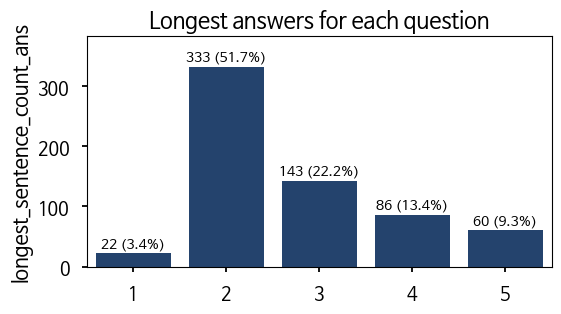

In [39]:
plt.figure(figsize=(6, 3))
ax = sns.barplot(train_label['longest_sentence_count_ans'].value_counts(), order=[1,2,3,4,5])
for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s = f"{round(y)} ({y/train_df.shape[0]*100:.1f}%)"
    ax.text(x, y+10, s, ha='center')
ax.set_ylim(top=ax.get_ylim()[1]*1.1)
plt.title("Longest answers for each question")
plt.show()

In [40]:
train_label['longest_sentence_count_ans'].value_counts()

2    333
3    143
4     86
5     60
1     22
Name: longest_sentence_count_ans, dtype: int64

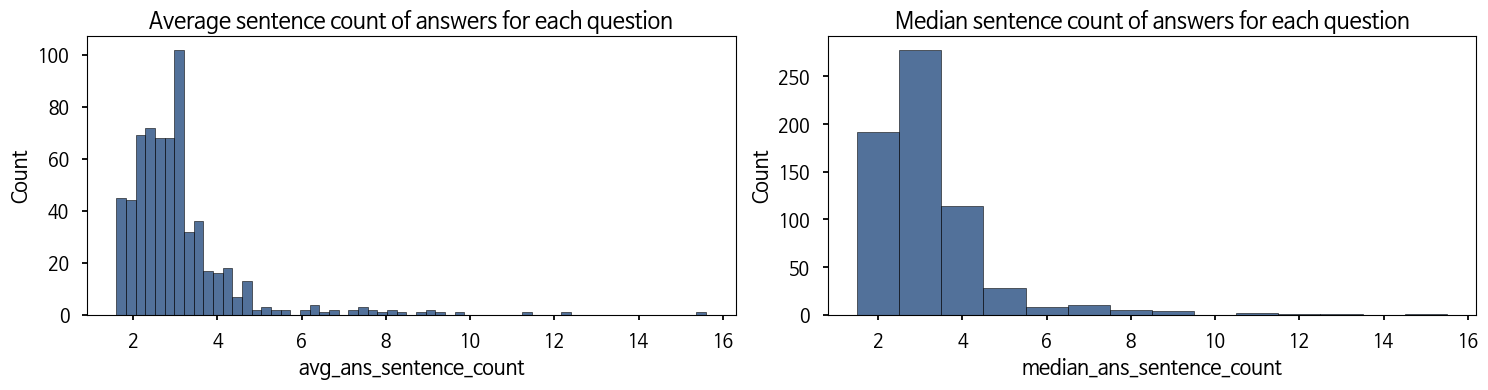

In [41]:
fig = plt.figure(figsize=(15, 4))

fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(train_label['avg_ans_sentence_count'])
ax1.set_title('Average sentence count of answers for each question')

fig.add_subplot(1, 2, 2)
ax2 = sns.histplot(train_label['median_ans_sentence_count'], discrete=True)
ax2.set_title('Median sentence count of answers for each question')

plt.tight_layout()
plt.show()

In [42]:
test_df['q_sentence_count'] = test_df['질문'].map(lambda x: len(kiwi.split_into_sents(x)))

In [43]:
test_df['q_sentence_count'].value_counts()

1    65
2    64
3     1
Name: q_sentence_count, dtype: int64

In [44]:
test_df['질문'].head(5).values

array(['방청 페인트의 종류에는 어떤 것들이 있는지 알고 계신가요? 또한, 원목사이딩을 사용하는 것에 어떤 단점이 있을까요?',
       '도배지에 녹은 자국이 발생하는 주된 원인과 그 해결 방법은 무엇인가요?',
       '큐블럭의 단점을 알려주세요. 또한, 압출법 단열판을 사용하는 것의 장점은 무엇인가요?',
       '철골구조를 사용하는 고층 건물에서, 단열 효과를 높이기 위한 시공 방법은 무엇이 있을까요?',
       '도배지의 완전한 건조를 위해 몇 주 동안 기다려야 하나요?'], dtype=object)

In [169]:
categories = train_df['category'].value_counts().index.to_list()
categories

['마감재', '인테리어', '시공', '마감하자', '건축구조', '기타', '타 마감하자']